The Code Seeks to Sample F(t)= sin(at)+sin(bt) at different sampling rate, perform FFT on the sampled data, and determine the frequency of F(t).

Libraries used in the execution will be:
* Numpy
* Scipy (fft & fftfreq)
* Matplotlib

For this experiment we will use the following frequencies
a = 20 Hz, b = 40 Hz, sampling rate = 50 Hz, 100 Hz and 200 Hz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

Since the frequencies of the two sine wave frequencies are not given, for this we will use frequencies of a = 20 Hz and b = 40 Hz

In [2]:
# Define the signal function parameters
a = 20  # Frequency of first sine wave (in Hz)
b = 40  # Frequency of second sine wave (in Hz)
duration = 1.0  # seconds
t_high_res = np.linspace(0.0, duration, 1000, endpoint=False)  # High resolution time array

In [3]:
# Define F(t) = sin(at) + sin(bt)
F = np.sin(2 * np.pi * a * t_high_res) + np.sin(2 * np.pi * b * t_high_res)

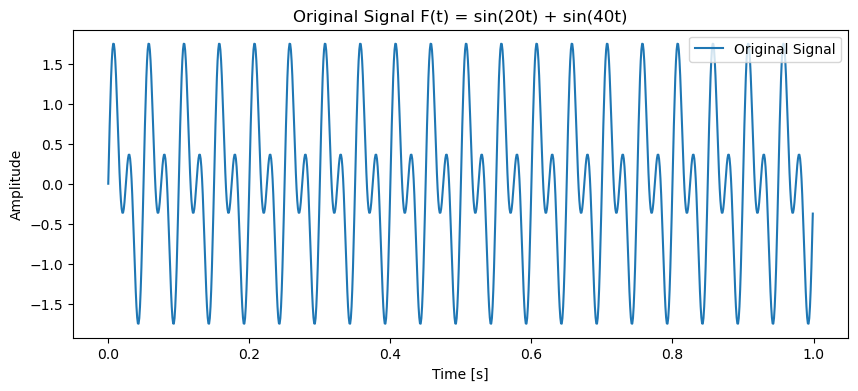

In [7]:
# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(t_high_res, F, label="Original Signal")
plt.title("Original Signal F(t) = sin(20t) + sin(40t)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [5]:
# Define different sampling rates
sampling_rates = [50, 100, 200]  # in Hz

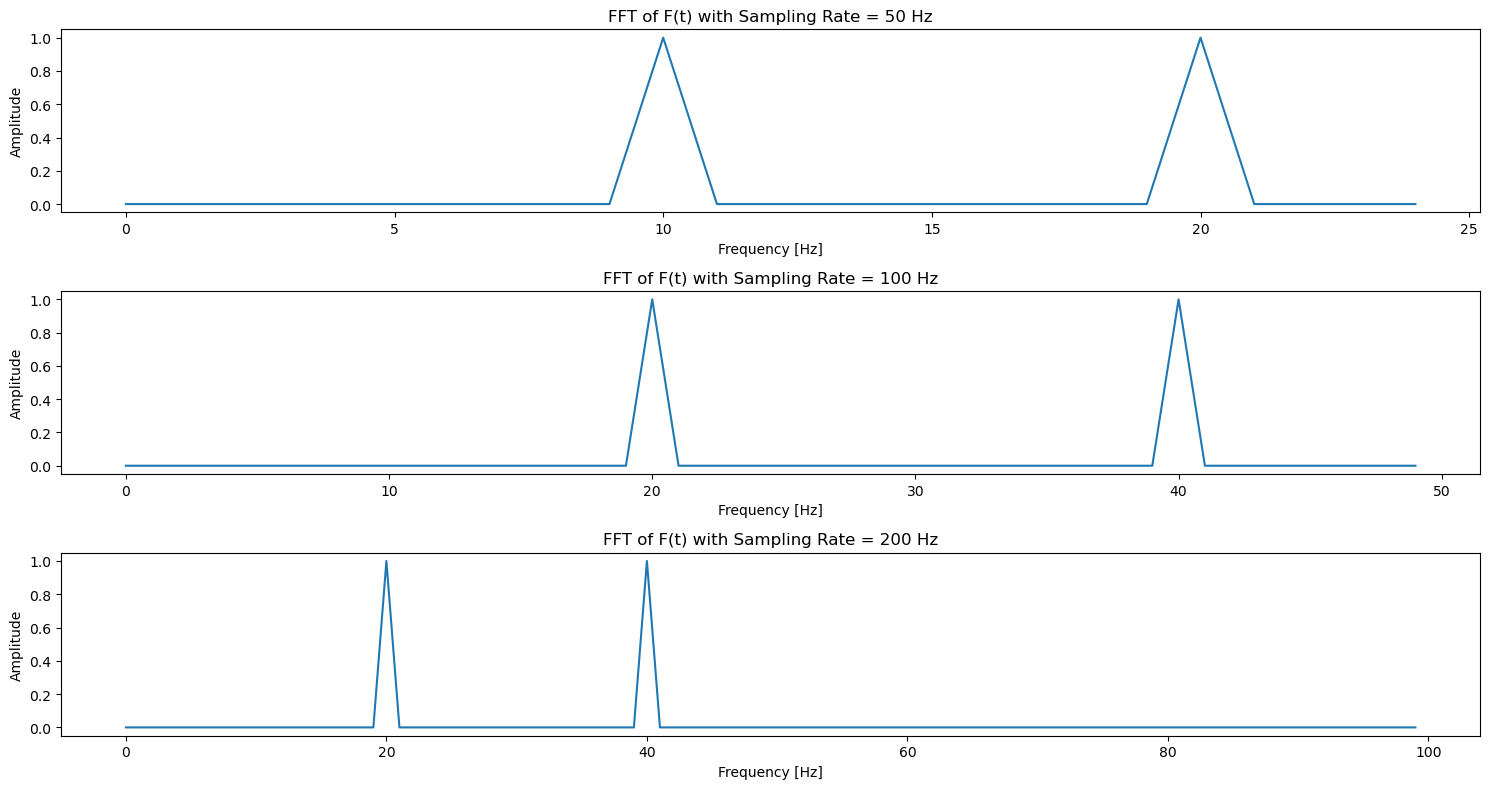

In [6]:

# Plot FFTs for different sampling rates
plt.figure(figsize=(15, 8))

for i, fs in enumerate(sampling_rates):
    t = np.linspace(0.0, duration, int(fs * duration), endpoint=False)  # Time array for sampling
    F_sampled = np.sin(2 * np.pi * a * t) + np.sin(2 * np.pi * b * t)
    
    # Perform FFT
    N = len(F_sampled)
    yf = fft(F_sampled)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    
    # Plot FFT result
    plt.subplot(3, 1, i + 1)
    plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
    plt.title(f"FFT of F(t) with Sampling Rate = {fs} Hz")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()
